<h1>Data Wrangling</h1>

Convert data from the initial format to a format that may be better for analysis.

<h3>Import Lybraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Reading the data set</h3>

In [3]:
df = pd.read_csv("auto.csv",header=None)
df.columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
#Identifies the datatypes of each variables
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<b>Steps for working with missing data:</b>
<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Identify and Handle missing values</h3>

In the given Car dataset, we need to find how many missing values or "?" are there in each variables.

In [6]:
#Find out how many missing values("?") are there in each variables.
def missing_values():
    newlist=[]
    count=0
    for i in df.columns.values:
        if df[i].dtype == object:
            newlist.append(i)
    for i in newlist:
        columnlist = len(df[df[i]=="?"])
        if columnlist != 0:
            print(f"{i} have {columnlist} missing datas")
            count =+1
    if count == 0:
        print("There is no Missing or ? values")
    print("===========================================")
    #Find how many null values are there in each variables.
    count=0
    for i in df.columns.values:
        nullvalue = len(df[df[i].isnull()])
        if nullvalue != 0:
            print(f"The number of null values in column {i}: {nullvalue}")
            count =+1
    if count==0:
        print("There is no Null or NAN values")
        
missing_values()

normalized-losses have 41 missing datas
num-of-doors have 2 missing datas
bore have 4 missing datas
stroke have 4 missing datas
horsepower have 2 missing datas
peak-rpm have 2 missing datas
price have 4 missing datas
There is no Null or NAN values


<b>Convert ? to NAN</b>

In [7]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["num-of-doors"].replace("?",np.nan,inplace=True)
df["bore"].replace("?",np.nan,inplace=True)
df["stroke"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)
df["peak-rpm"].replace("?",np.nan,inplace=True)
df["price"].replace("?",np.nan,inplace=True)

In [8]:
#Check again to find is there is any missing or null values in each variables
missing_values()

There is no Missing or ? values
The number of null values in column normalized-losses: 41
The number of null values in column num-of-doors: 2
The number of null values in column bore: 4
The number of null values in column stroke: 4
The number of null values in column horsepower: 2
The number of null values in column peak-rpm: 2
The number of null values in column price: 4


<h3>Deal with the given missing values</h3>
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<b>Change the Datatype to float</b>

In [9]:
df["normalized-losses"] = df["normalized-losses"].astype(float)
df["stroke"] = df["stroke"].astype(float)
df["bore"] = df["bore"].astype(float)
df["horsepower"] = df["horsepower"].astype(float)
df["peak-rpm"] = df["peak-rpm"].astype(float)
df["price"] = df["price"].astype(float)

<b>Replace by Mean</b>

In [10]:
floatlist = ["normalized-losses","stroke","bore","horsepower","peak-rpm"]
for i in floatlist:
    mean = df[i].mean()
    df[i].replace(np.nan,mean,inplace=True)

In [11]:
#Check the number of null values
missing_values()

There is no Missing or ? values
The number of null values in column num-of-doors: 2
The number of null values in column price: 4


<b>Replace with frequency</b>

In [12]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [13]:
df["num-of-doors"].replace(np.nan,"four",inplace=True)

In [14]:
#Check the number of null values
missing_values()

There is no Missing or ? values
The number of null values in column price: 4


<b>Drop the entire row that do not have the price values</b>

In [15]:
#Drop the entire row, that do not have Price data.
df.dropna(subset=["price"],axis=0,inplace=True)
#Reset all the rows.
df.reset_index(drop=True, inplace=True)

In [16]:
#Recheck the datatype again.
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [18]:
#Check again for the number of null or missing values
missing_values()

There is no Missing or ? values
There is no Null or NAN values


<h2 id="data_standardization">Data Standardization</h2>

<p>Transform datas into a common format which allows the researcher to make the meaningful comparison. </p>

<b>Converting MPG to KMPL</b>

In [19]:
df["highway-mpg"]=df["highway-mpg"]/2.352
df["city-mpg"]=df["city-mpg"]/2.352

In [20]:
df.rename(columns={"highway-mpg":"highway-KMPL"},inplace=True)
df.rename(columns={"city-mpg":"city-KMPL"},inplace=True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-KMPL,highway-KMPL,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,8.928571,11.479592,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,8.928571,11.479592,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,8.078231,11.054422,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,10.204082,12.755102,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,7.653061,9.353741,17450.0


<h2 id="binning">Binning</h2>

<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

In [22]:
#Convert horsepower to int dtypes
df["horsepower"] = df["horsepower"].astype(float)

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. We can categorize all these uniform datas to discrete datas ie, "High", "Medium" and "Low"

In [23]:
bins = np.linspace(df["horsepower"].min(),df["horsepower"].max(),4)
group_name = ["low","medium","high"]
df["horsepower-binned"] = pd.cut(df["horsepower"],bins=bins,labels=group_name,include_lowest=True)
df[["horsepower","horsepower-binned"]].head()

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low


C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Price')

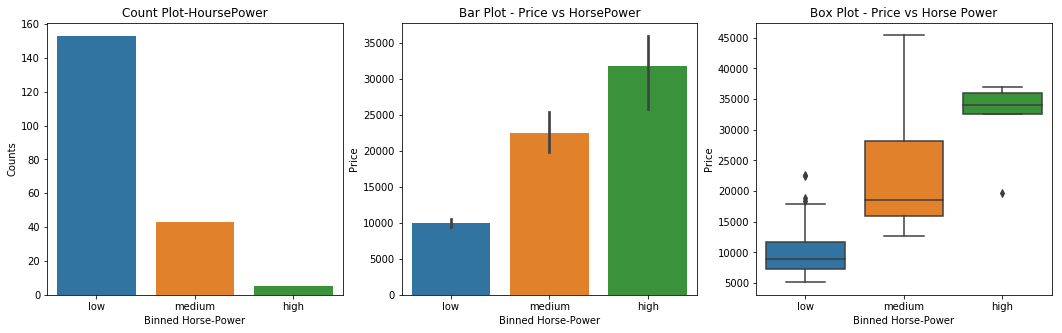

In [24]:
plt.figure(1,figsize=(18,5))
plt.subplot(131)
sns.countplot(df["horsepower-binned"])
plt.title("Count Plot-HoursePower")
plt.ylabel("Counts")
plt.xlabel("Binned Horse-Power")
plt.subplot(132)
sns.barplot(df["horsepower-binned"],df["price"])
plt.title("Bar Plot - Price vs HorsePower")
plt.xlabel("Binned Horse-Power")
plt.ylabel("Price")
plt.subplot(133)
sns.boxplot(df["horsepower-binned"],df["price"])
plt.title("Box Plot - Price vs Horse Power")
plt.xlabel("Binned Horse-Power")
plt.ylabel("Price")

<h2 id="indicator">Dummy Variables</h2>

We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables. 

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [25]:
#Obtain dummy variables for "fuel-type" variable.
dummy_var_1 = pd.get_dummies(df["fuel-type"])
df = pd.concat([df,dummy_var_1],axis=1)
df.drop("fuel-type",axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-KMPL,highway-KMPL,price,horsepower-binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,8.928571,11.479592,13495.0,low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,8.928571,11.479592,16500.0,low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154.0,5000.0,8.078231,11.054422,16500.0,medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102.0,5500.0,10.204082,12.755102,13950.0,low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115.0,5500.0,7.653061,9.353741,17450.0,low,0,1


In [26]:
#Obtain dummy variables for "aspiration" variable.
dummy_var_2 = pd.get_dummies(df["aspiration"])
df = pd.concat([df,dummy_var_2],axis=1)
df.drop("aspiration",axis=1,inplace=True)
df.rename(columns={"std":"aspiration-std","turbo":"aspiration-turbo"},inplace=True)

<b>Export to New CSV dataset</b>

In [27]:
df.to_csv("clean_df.csv")